In [288]:
# Core
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization 
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             precision_recall_fscore_support, roc_curve, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, regularizers, models

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

#Load datasets
df = pd.read_csv("/Users/darwinjuan/Downloads/heart disease.csv")
target = "HeartDisease"
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [262]:
# Inspect structure
print("Heart Disease Dataset Shape:", df.shape)
df.info()

Heart Disease Dataset Shape: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [263]:
#Check missing values
df.isna().sum().sort_values(ascending=False).head(12)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [264]:
print(df["HeartDisease"].value_counts(dropna=False))

HeartDisease
1    508
0    410
Name: count, dtype: int64


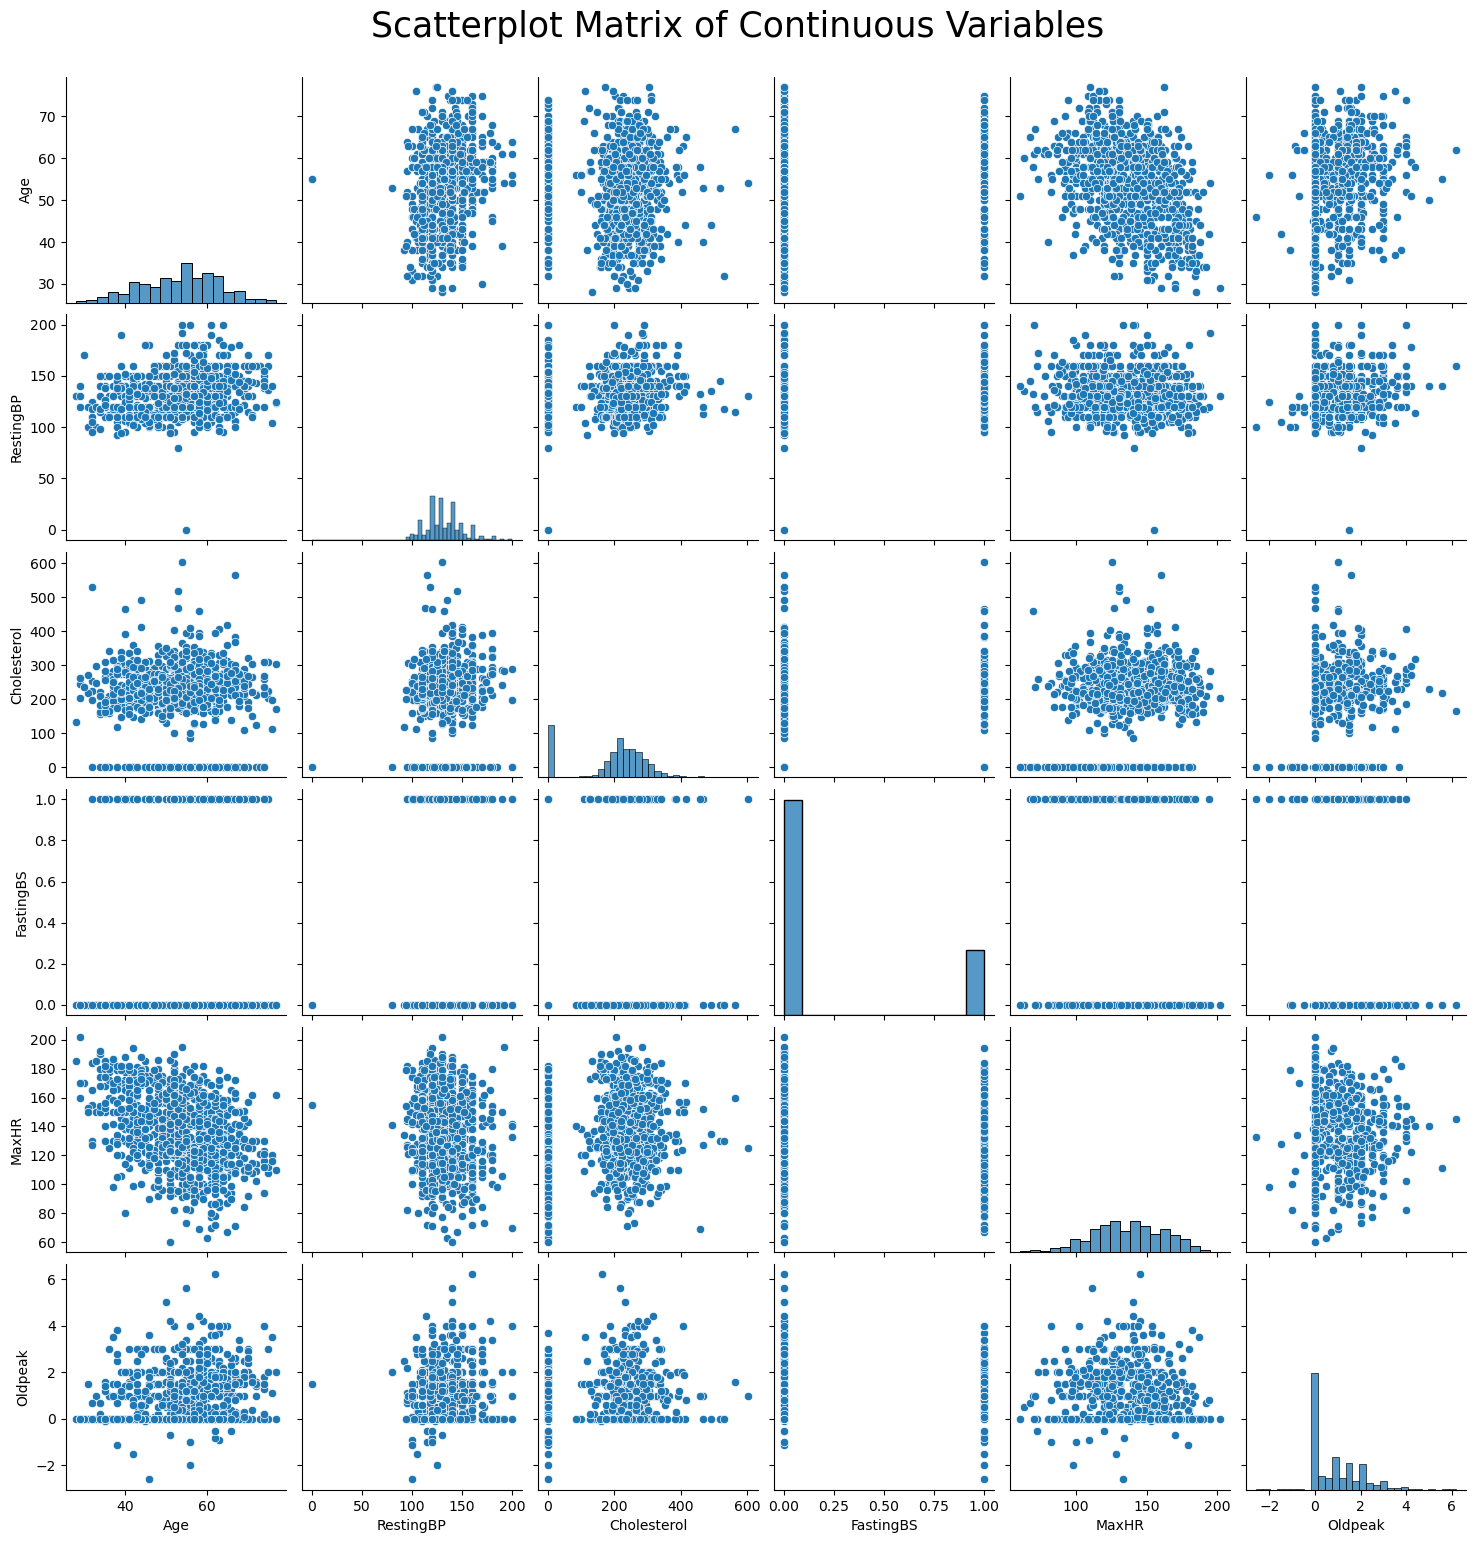

In [265]:
#Sorting variables
num_vars = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
cat_vars = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

#Scatterplot Matrix
sns.pairplot(df[num_vars])
plt.suptitle("Scatterplot Matrix of Continuous Variables", fontsize = 25, y = 1.03)
plt.show()

In [266]:
#EDA of numeric variables
print(df[num_vars].describe().T)

             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2


In [267]:
#Look at frequency count for categorical variables
print(df["Sex"].value_counts(dropna=False))
print(df["ChestPainType"].value_counts(dropna=False))
print(df["RestingECG"].value_counts(dropna=False))
print(df["ExerciseAngina"].value_counts(dropna=False))
print(df["ST_Slope"].value_counts(dropna=False))

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


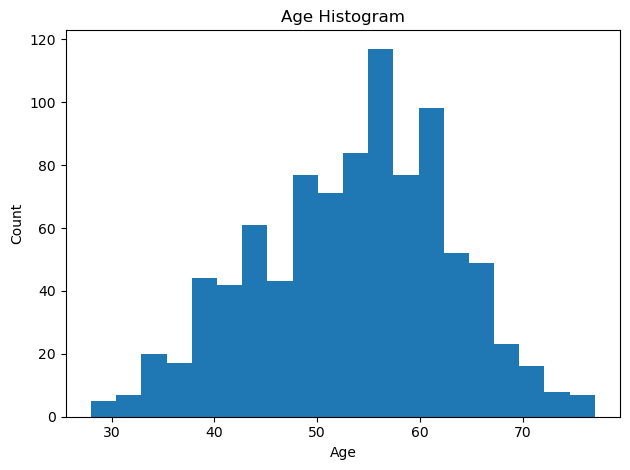

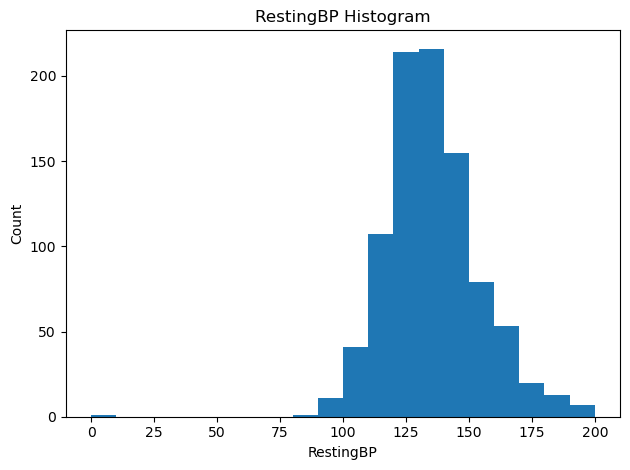

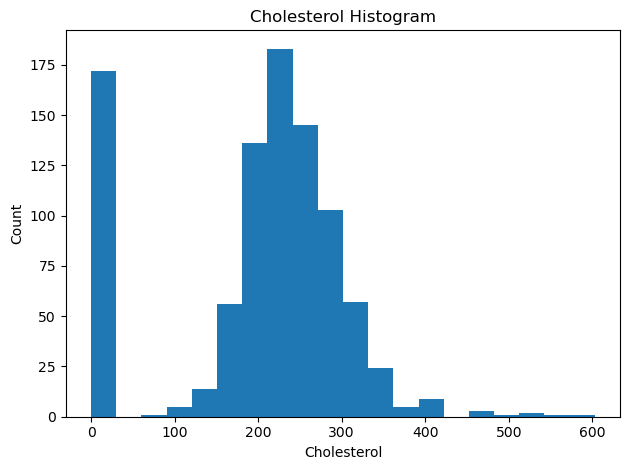

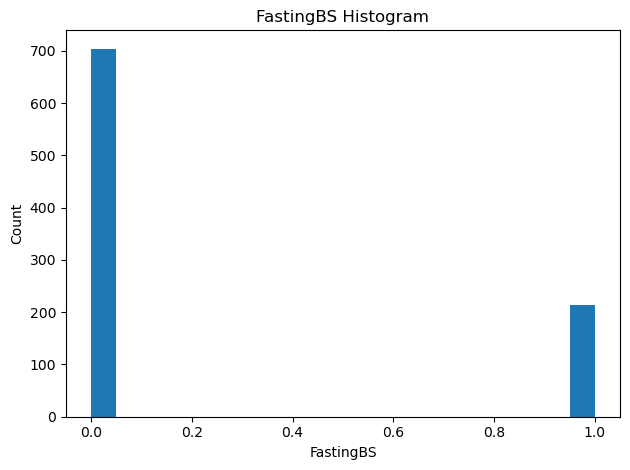

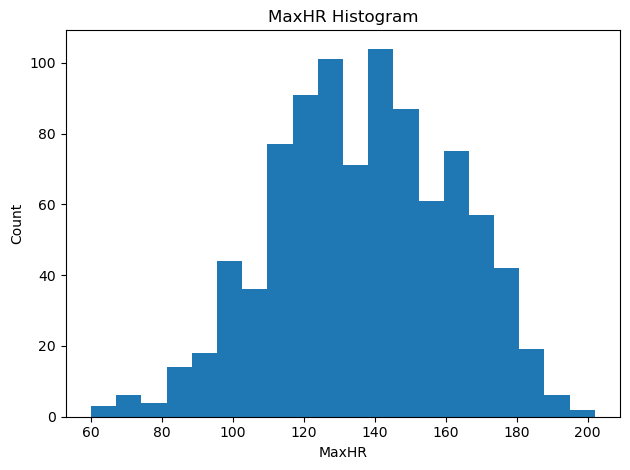

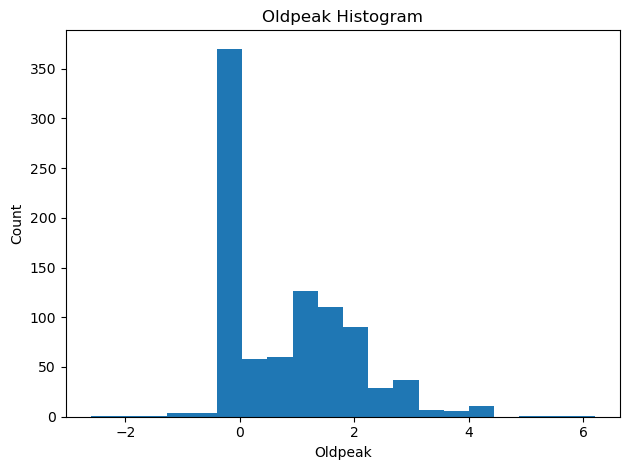

In [268]:
#Numeric variable histograms
def hist(col, bins=20):
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"{col} Histogram")
    plt.xlabel(col); 
    plt.ylabel("Count");
    plt.tight_layout(); 
    plt.show()
for c in num_vars:
    hist(c, bins=20)

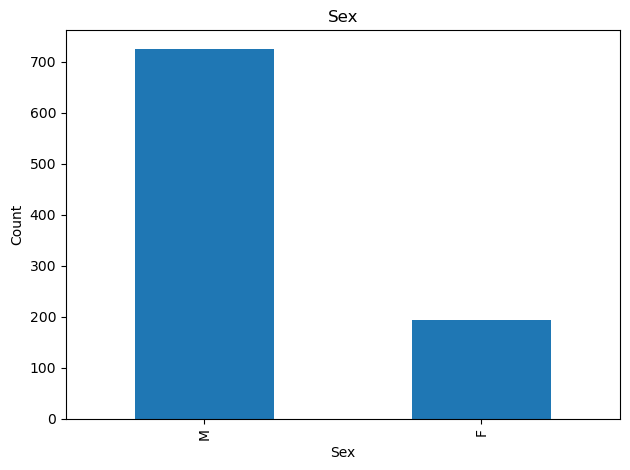

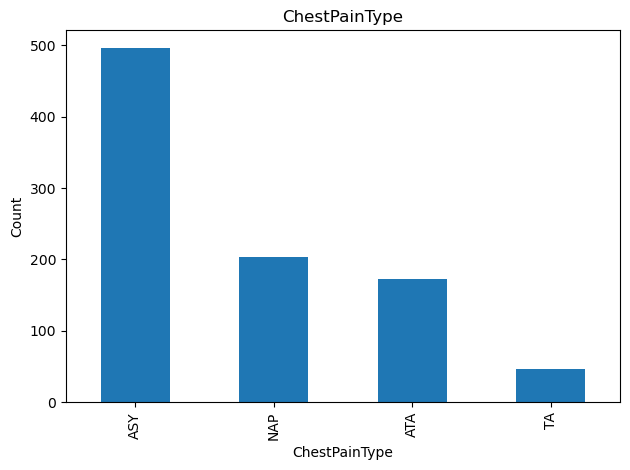

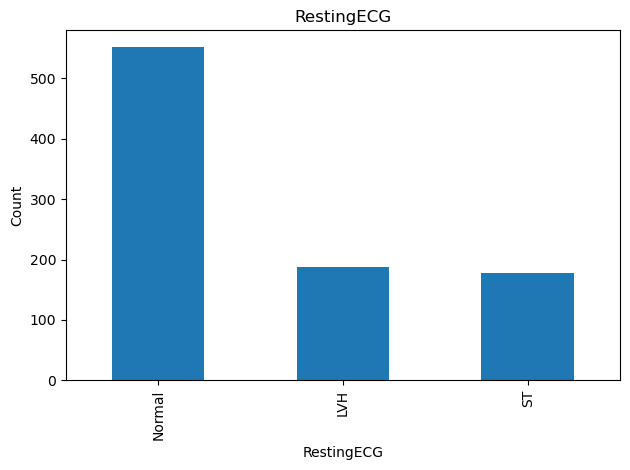

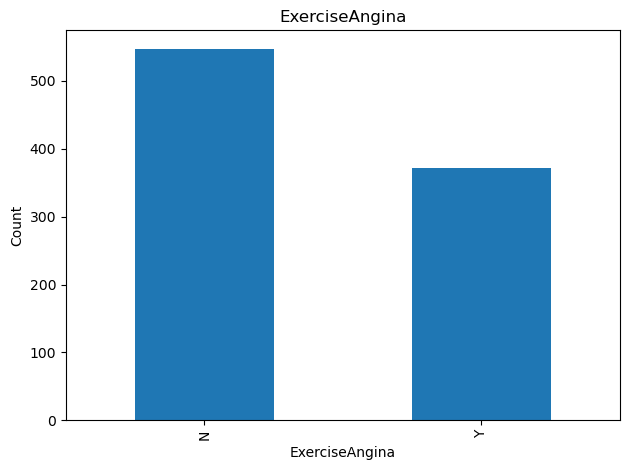

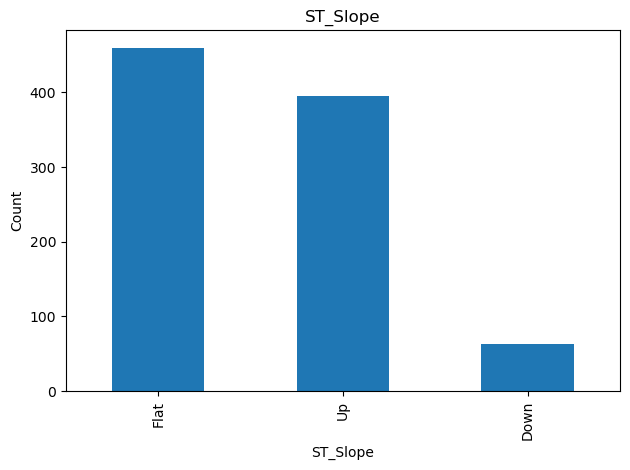

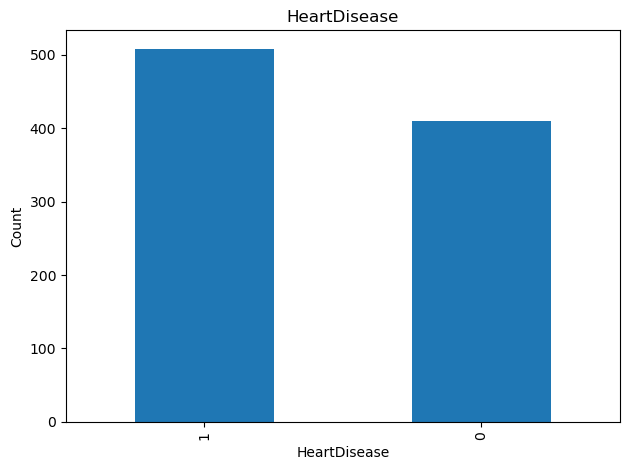

In [269]:
#Categorical variable plots
def plot(col):
    counts = hd[col].value_counts(dropna=False)
    plt.figure()
    counts.plot(kind="bar")
    plt.title(f"{col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout(); 
    plt.show()
for c in cat_vars:
    plot(c)

#Target variable distribution
plot("HeartDisease")

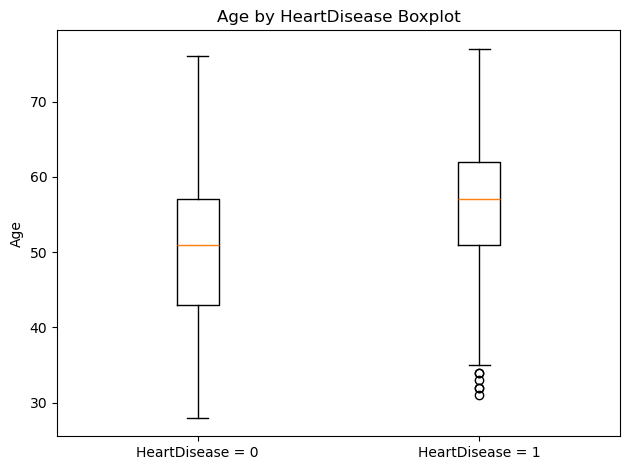

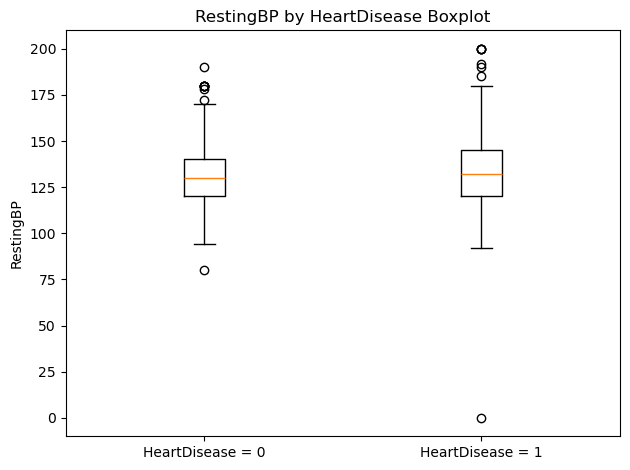

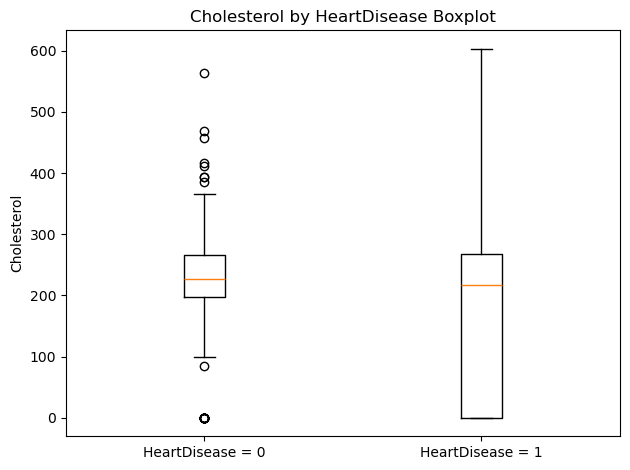

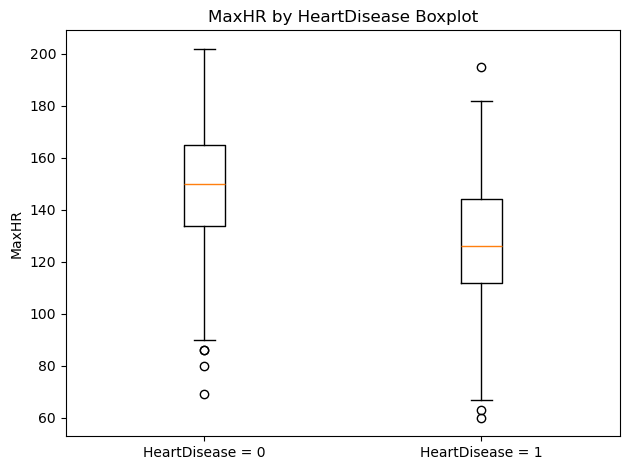

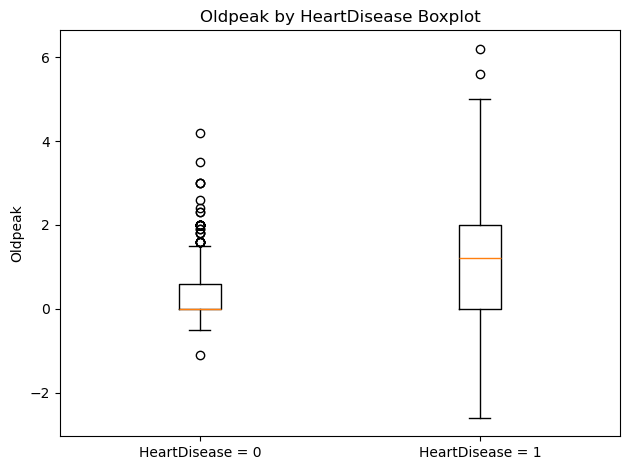

In [270]:
#Boxplots to compare numeric variables to target variable
def target_boxplot(num_vars, target="HeartDisease"):
    plt.figure()
    df0 = hd.loc[df[target]==0, num_vars]
    df1 = hd.loc[df[target]==1, num_vars]
    plt.boxplot([df0, df1], tick_labels=[f"{target} = 0", f"{target} = 1"])
    plt.title(f"{num_vars} by {target} Boxplot")
    plt.ylabel(num_vars)
    plt.tight_layout(); 
    plt.show()

for c in ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]:
    target_boxplot(c, target="HeartDisease")

In [271]:
#Crosstabs for categorical variables
def crosstab(df, rows, cols):
    ct = pd.crosstab(df[rows], df[cols])
    display(ct.style.format().set_caption(f'{rows} × {cols} (count)'))

    ct_rowp = pd.crosstab(df[rows], df[cols], normalize='index')
    display(ct_rowp.style.format().set_caption(f'{rows} × {cols} (row %)'))

crosstab(df, "Sex", "HeartDisease")
crosstab(df, "ChestPainType", "HeartDisease")
crosstab(df, "ST_Slope", "HeartDisease")
crosstab(df, "FastingBS", "HeartDisease")
crosstab(df, "RestingECG", "HeartDisease")
crosstab(df, "ExerciseAngina", "HeartDisease")

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


HeartDisease,0,1
ST_Slope,,
Down,14,49
Flat,79,381
Up,317,78


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


HeartDisease,0,1
FastingBS,,
0,0.519886,0.480114
1,0.205607,0.794393


HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


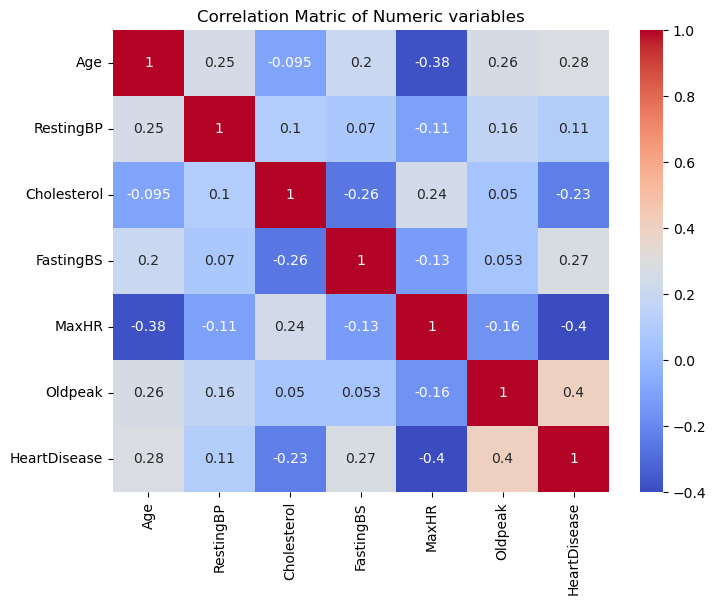

In [272]:
#Correlation matrix of numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matric of Numeric variables")
plt.show()

In [273]:
#Train/Test Split
X = df[num_vars + cat_vars]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

print(X_train.shape)
print(X_test.shape)


(688, 11)
(230, 11)


In [274]:
#Preprocess
num_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])
cat_tf = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_vars),
        ("cat", cat_tf, cat_vars)
    ],remainder="drop")


In [275]:
#Logistic Regression Model
logreg = Pipeline([
    ('prep', preprocess),
    ("clf", LogisticRegression(max_iter=500, random_state=RANDOM_STATE))])

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8826086956521739
Precision: 0.8731343283582089
Recall: 0.9212598425196851
F1: 0.896551724137931
ROC-AUC: 0.9320388349514562


In [276]:
#RBF SVM Model
svm_rbf = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE))
])

#Linear SVM Model
svm_linear = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", SVC(kernel="linear", probability=True, random_state=RANDOM_STATE))
])

for name, model in [('SVM-Linear', svm_linear), ('SVM-RBF', svm_rbf)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


SVM-Linear
Accuracy: 0.8739130434782608
Precision: 0.8656716417910447
Recall: 0.9133858267716536
F1: 0.8888888888888888
ROC-AUC: 0.9334913232933262

SVM-RBF
Accuracy: 0.9
Precision: 0.8880597014925373
Recall: 0.937007874015748
F1: 0.9118773946360154
ROC-AUC: 0.9522207782279642


In [277]:
#Gradient Boosting Model
gb = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", GradientBoostingClassifier(random_state=RANDOM_STATE))
])

for name, model in [('Gradient Boosting', gb)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Gradient Boosting
Accuracy: 0.8913043478260869
Precision: 0.9047619047619048
Recall: 0.8976377952755905
F1: 0.9011857707509882
ROC-AUC: 0.9370843207705832


<Figure size 640x480 with 0 Axes>

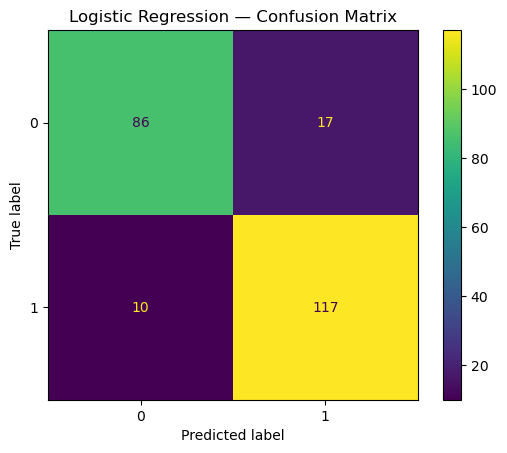

<Figure size 640x480 with 0 Axes>

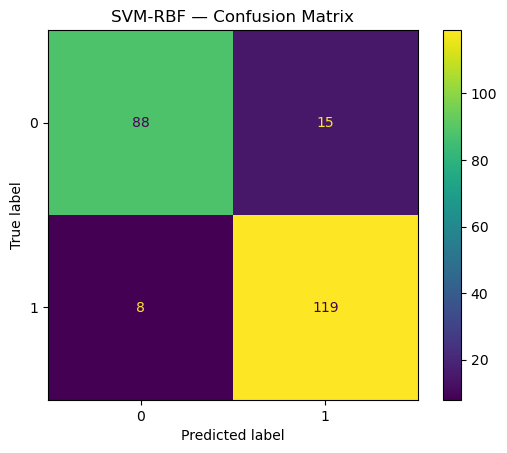

<Figure size 640x480 with 0 Axes>

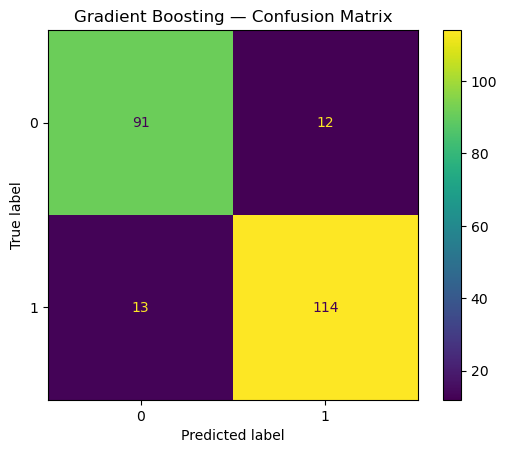

In [278]:
#Confusion Matrices
fig = plt.figure()
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Logistic Regression — Confusion Matrix')
plt.show()

fig = plt.figure()
ConfusionMatrixDisplay.from_estimator(svm_rbf, X_test, y_test)
plt.title('SVM-RBF — Confusion Matrix')
plt.show()

fig = plt.figure()
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)
plt.title('Gradient Boosting — Confusion Matrix')
plt.show()


<Figure size 640x480 with 0 Axes>

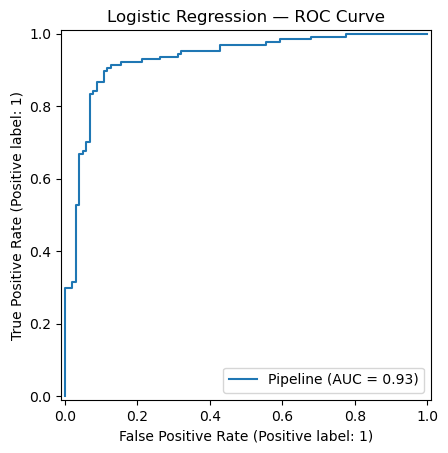

<Figure size 640x480 with 0 Axes>

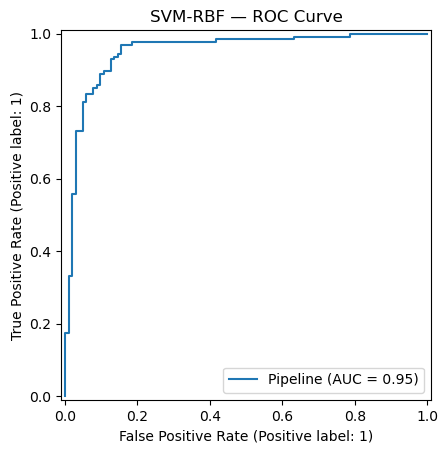

<Figure size 640x480 with 0 Axes>

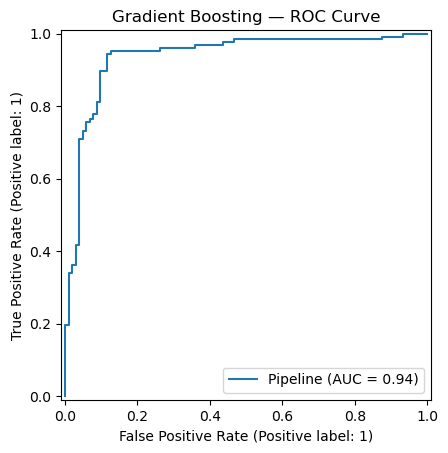

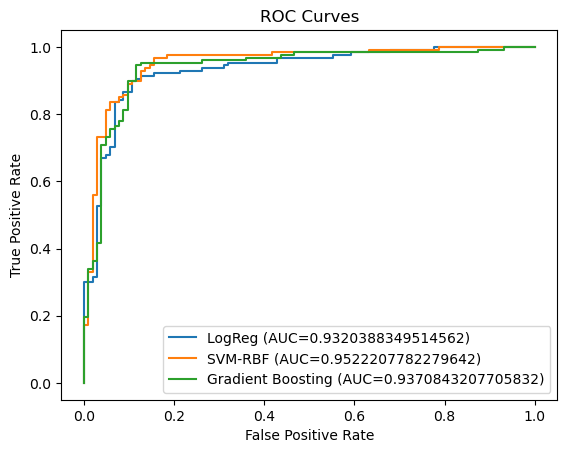

In [279]:
#ROC Curves
fig = plt.figure()
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Logistic Regression — ROC Curve')
plt.show()

fig = plt.figure()
RocCurveDisplay.from_estimator(svm_rbf, X_test, y_test)
plt.title('SVM-RBF — ROC Curve')
plt.show()

fig = plt.figure()
RocCurveDisplay.from_estimator(gb, X_test, y_test)
plt.title('Gradient Boosting — ROC Curve')
plt.show()

plt.figure()
for r in results:
    if r["proba"] is not None:
        fpr, tpr, _ = roc_curve(y_test, r["proba"])
        plt.plot(fpr, tpr, label=f'{r["model"]} (AUC={roc_auc_score(y_test, r["proba"])})')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(); 
plt.show()

In [234]:
#Model Comparison Summary 
models = {
    'Logistic Regression': logreg,
    'SVM-RBF': svm_rbf,
    'Gradient Boosting': gb
}

summary = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    summary.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
    })

summary_df = pd.DataFrame(summary).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)


cols_to_highlight = ['accuracy','precision','recall','f1','roc_auc']

styled = summary_df.style.highlight_max(subset=cols_to_highlight, axis=0, color='lightgreen')
display(styled)

,model,accuracy,precision,recall,f1,roc_auc
0,SVM-RBF,0.900000,0.888060,0.937008,0.911877,0.952221
1,Gradient Boosting,0.891304,0.904762,0.897638,0.901186,0.937084
2,Logistic Regression,0.882609,0.873134,0.921260,0.896552,0.932039


In [352]:
#Train, test, validation split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.10, random_state=RANDOM_STATE, stratify=y_train_full
)

#Preprocess
num_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])
cat_tf = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_vars),
        ("cat", cat_tf, cat_vars)
    ],remainder="drop")

X_train_s = preprocess.fit_transform(X_train)
X_val_s   = preprocess.transform(X_val)
X_test_s  = preprocess.transform(X_test)

print("Train/Validation/Test Shape:", X_train_s.shape, X_val_s.shape, X_test_s.shape)

Train/Validation/Test Shape: (660, 20) (74, 20) (184, 20)


In [335]:
#Build MLP with Keras
def build_mlp(input_dim, l2=1e-4, dropout=0.2):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    return model

mlp = build_mlp(X_train_s.shape[1])

In [336]:
#Callbacks
ckpt_path = "best_mlp.keras"
cbs = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ModelCheckpoint(ckpt_path, save_best_only=True, monitor='val_loss')
]

hist = mlp.fit(X_train_s, y_train, validation_data=(X_val_s, y_val),
               epochs=100, batch_size=32, callbacks=cbs, verbose=0)

print("Best val loss:", min(hist.history['val_loss']))

# Evaluate
test_metrics = mlp.evaluate(X_test_s, y_test, return_dict=True, verbose=0)
test_metrics

2025-10-26 13:51:40.626063: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Best val loss: 0.4362708330154419


{'accuracy': 0.885869562625885,
 'auc': 0.9377092123031616,
 'loss': 0.3313601315021515}

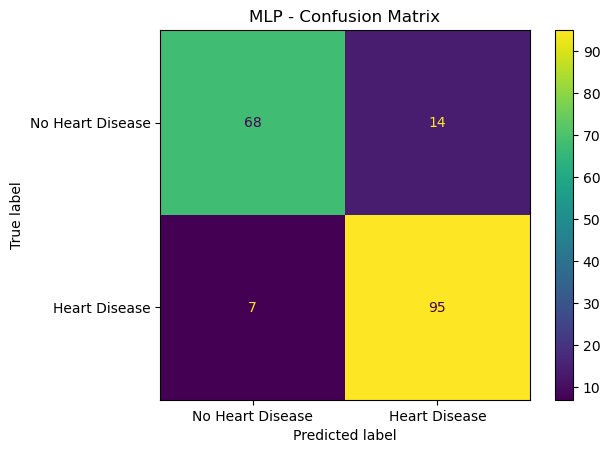

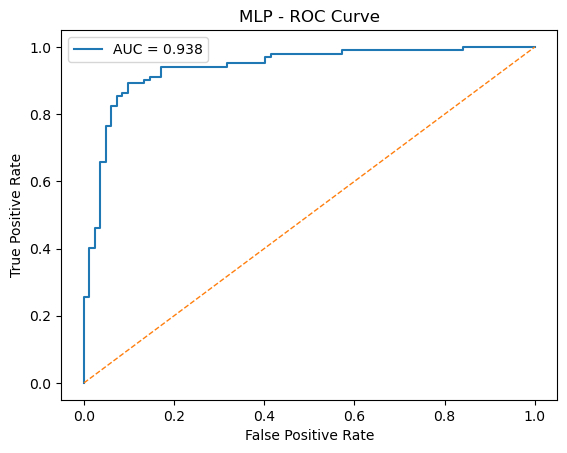

                  precision    recall  f1-score   support

No Heart Disease       0.91      0.83      0.87        82
   Heart Disease       0.87      0.93      0.90       102

        accuracy                           0.89       184
       macro avg       0.89      0.88      0.88       184
    weighted avg       0.89      0.89      0.89       184



In [357]:
#Confusion matrix and ROC curve
y_proba = mlp.predict(X_test_s, verbose=0).ravel()  
y_pred  = (y_proba >= 0.5).astype(int)                  

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Heart Disease","Heart Disease"])
disp.plot()
plt.title("MLP - Confusion Matrix")
plt.show()

fpr, tpr, thr = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)  
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], '--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP - ROC Curve")
plt.legend()
plt.show()

print(classification_report(y_test, y_pred, target_names=["No Heart Disease","Heart Disease"]))

Test Accuracy: 0.886


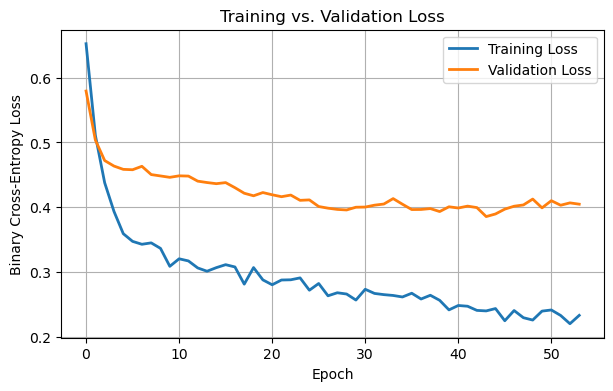

In [318]:
#Plot training vs validation loss over epochs
results = mlp.evaluate(X_test_s, y_test, verbose=0)
test_loss = results[0]  
test_acc = results[1]   
print(f"Test Accuracy: {test_acc:.3f}")

plt.figure(figsize=(7, 4))
plt.plot(hist.history['loss'], label='Training Loss',   linewidth=2)
plt.plot(hist.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch'); 
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('MLP - Training vs. Validation Loss')
plt.legend(); 
plt.grid(True); 
plt.show()


In [324]:
#RNN GRU Model
def to_sequence(X2d: np.ndarray) -> np.ndarray:
    X2d = np.asarray(X2d, dtype=np.float32)
    return X2d.reshape(X2d.shape[0], X2d.shape[1], 1)

timesteps = X_train_s.shape[1]  
X_train_seq = to_sequence(X_train_s)
X_val_seq   = to_sequence(X_val_s)
X_test_seq  = to_sequence(X_test_s)

#Build GRU Classifier 
rnn = keras.Sequential([
    layers.Input(shape=(timesteps, 1)),
    layers.GRU(32, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")   
])

rnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

#Train early stopping 
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
ckpt = callbacks.ModelCheckpoint("best_rnn.keras", save_best_only=True, monitor='val_loss')

hist = rnn.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val), epochs=100,
               batch_size=32, callbacks=[es, ckpt], verbose=0)

#Evaluate
test_metric = rnn.evaluate(X_test_seq, y_test, return_dict=True, verbose=0)
test_metric

2025-10-26 13:29:08.672742: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


{'accuracy': 0.760869562625885,
 'auc': 0.836262583732605,
 'loss': 0.5348861813545227}

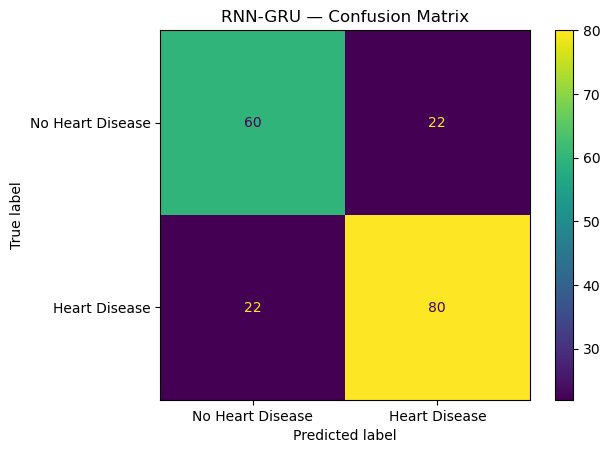

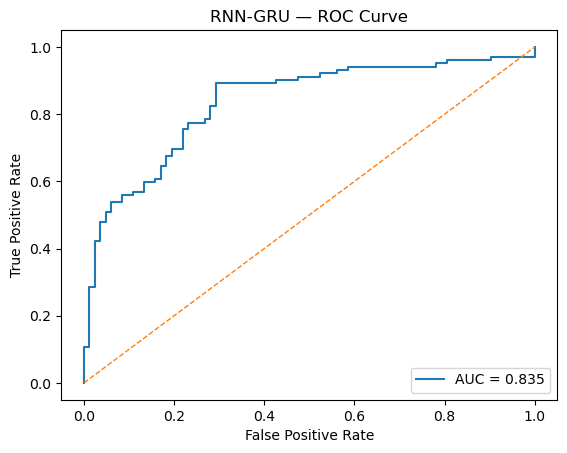

                  precision    recall  f1-score   support

No Heart Disease       0.91      0.83      0.87        82
   Heart Disease       0.87      0.93      0.90       102

        accuracy                           0.89       184
       macro avg       0.89      0.88      0.88       184
    weighted avg       0.89      0.89      0.89       184



In [356]:
#Confusion Matrix
y_proba_gru = rnn.predict(X_test_seq, verbose=0).ravel()
y_pred_gru  = (y_proba_gru >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_gru)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot()
plt.title("RNN-GRU — Confusion Matrix")
plt.show()

#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_gru)
auc_val = roc_auc_score(y_test, y_proba_gru)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
plt.plot([0,1], [0,1], '--', lw=1)
plt.xlabel("False Positive Rate"); 
plt.ylabel("True Positive Rate");
plt.title("RNN-GRU — ROC Curve");
plt.legend(loc="lower right");
plt.show()

print(classification_report(y_test, y_pred, target_names=["No Heart Disease","Heart Disease"]))

Test Accuracy: 0.761


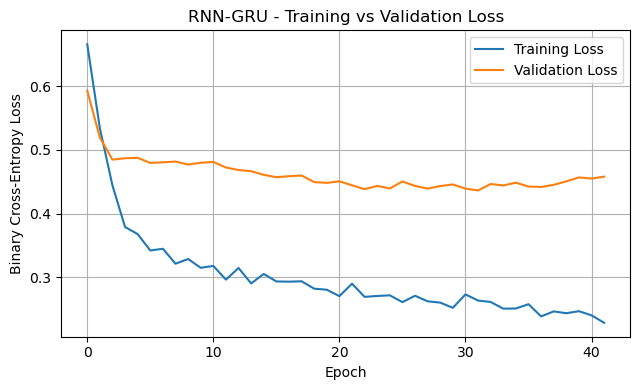

In [354]:
#Training vs Validation loss curve
res = rnn.evaluate(X_test_seq, y_test, verbose=0)
test_loss = res[0]  
test_acc = res[1]   
print(f"Test Accuracy: {test_acc:.3f}")

plt.figure(figsize=(6.5,4))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Binary Cross-Entropy Loss')
plt.title('RNN-GRU - Training vs Validation Loss'); 
plt.legend(); 
plt.grid(True); 
plt.tight_layout(); 
plt.show()

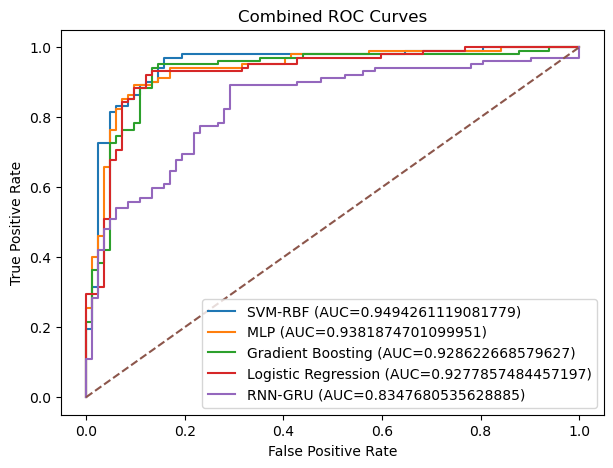

In [360]:
probas = {
    "SVM-RBF": svm_rbf.predict_proba(X_test)[:, 1],
    "MLP": mlp.predict(X_test_s, verbose=0).ravel(),
    "Gradient Boosting": gb.predict_proba(X_test)[:, 1],
    "Logistic Regression": logreg.predict_proba(X_test)[:, 1],   
    "RNN-GRU": rnn.predict(X_test_seq, verbose=0).ravel() 
}

plt.figure(figsize=(7,5))
for name, p in probas.items():
    fpr, tpr, _ = roc_curve(y_test, p)
    auc_val = roc_auc_score(y_test, p)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val})")
plt.plot([0,1], [0,1], "--");
plt.xlabel("False Positive Rate"); 
plt.ylabel("True Positive Rate");
plt.title("Combined ROC Curves");
plt.legend(loc="lower right"); 
plt.show()

In [362]:
#Model Comparison Summary 
models = {
    'Logistic Regression': logreg,
    'SVM-RBF': svm_rbf,
    'Gradient Boosting': gb
}

summary = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    summary.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
    })


y_prob_mlp = mlp.predict(X_test_s, verbose=0).ravel()
y_pred_mlp = (y_prob_mlp >= 0.5).astype(int)
summary.append({
    'model': 'MLP',
    'accuracy':  accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp),
    'recall':    recall_score(y_test, y_pred_mlp),
    'f1':        f1_score(y_test, y_pred_mlp),
    'roc_auc':   roc_auc_score(y_test, y_prob_mlp),
})

y_prob_gru = rnn.predict(X_test_seq, verbose=0).ravel()
y_pred_gru = (y_prob_gru >= 0.5).astype(int)
summary.append({
    'model': 'RNN-GRU',
    'accuracy':  accuracy_score(y_test, y_pred_gru),
    'precision': precision_score(y_test, y_pred_gru),
    'recall':    recall_score(y_test, y_pred_gru),
    'f1':        f1_score(y_test, y_pred_gru),
    'roc_auc':   roc_auc_score(y_test, y_prob_gru),
})


summary_df = pd.DataFrame(summary).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)


cols_to_highlight = ['accuracy','precision','recall','f1','roc_auc']

styled = summary_df.style.highlight_max(subset=cols_to_highlight, axis=0, color='lightgreen')
display(styled)

,model,accuracy,precision,recall,f1,roc_auc
0,SVM-RBF,0.896739,0.887850,0.931373,0.909091,0.949426
1,MLP,0.885870,0.871560,0.931373,0.900474,0.938187
2,Gradient Boosting,0.875000,0.891089,0.882353,0.886700,0.928623
3,Logistic Regression,0.885870,0.871560,0.931373,0.900474,0.927786
4,RNN-GRU,0.760870,0.784314,0.784314,0.784314,0.834768
